In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option("max_rows", None)

City Development

City location
Convenience

house type based on size, how many bedroom,restroom,garbage

In [2]:
Ames = pd.read_csv("data/Ames_HousePrice.csv", index_col=0)
Ames = Ames.reset_index(drop = True)
#Ames = Ames.drop("PID",axis=1)
#trains = pd.read_csv("train.csv", index_col=0)

In [3]:
Ames.shape

(2580, 81)

In [4]:
Ames.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

1. House related:
roof, exterior, masonry veneer, foundation, basement, 

heating, air-conditioner, electric, fireplace

bathroom,bedroom,kitchen,rooms,garage

Traffic convenience:

City location



2. Neighbourhood price/feet^2?

3. What is the price trend in years?

4. how do we define price/feet^2? Which area?

5. Maybe take rating columns to model first?

In [5]:
Ames.tail(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2570,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906.0,Unf,0.0,134.0,1040.0,GasA,Ex,Y,SBrkr,1040,0,0,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1.0,384.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2571,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,2fmCon,1Story,5,5,1968,1968,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,Fa,Mn,ALQ,890.0,Unf,0.0,0.0,890.0,GasA,Gd,N,SBrkr,890,0,0,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2572,905377050,1242,109900,20,RL,84.0,17808,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1946,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,484.0,484.0,GasA,TA,N,SBrkr,1242,0,0,0.0,0.0,1,0,2,1,TA,4,Mod,0,NaN,Attchd,1946.0,Unf,1.0,336.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2573,534430050,816,129800,30,RL,60.0,8550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1934,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,574.0,Unf,0.0,242.0,816.0,GasA,Ex,Y,SBrkr,816,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Fa,Attchd,1949.0,Unf,1.0,240.0,TA,TA,Y,228,0,40,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
2574,908128100,1724,196500,60,RL,62.0,7162,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,7,5,2003,2004,Hip,CompShg,HdBoard,Stucco,BrkFace,190.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,796.0,796.0,GasA,Ex,Y,SBrkr,806,918,0,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,616.0,TA,TA,Y,168,57,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,GLQ,841.0,Unf,0.0,144.0,985.0,GasA,Ex,Y,SBrkr,985,857,0,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y,193,96,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2579,9062

# Deal with missing data

Sale price is not normal

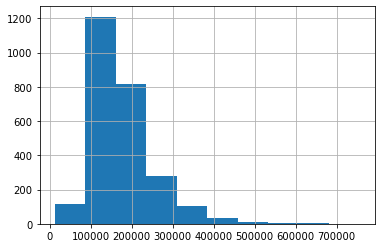

In [6]:
Ames.SalePrice.hist()

# Check missing

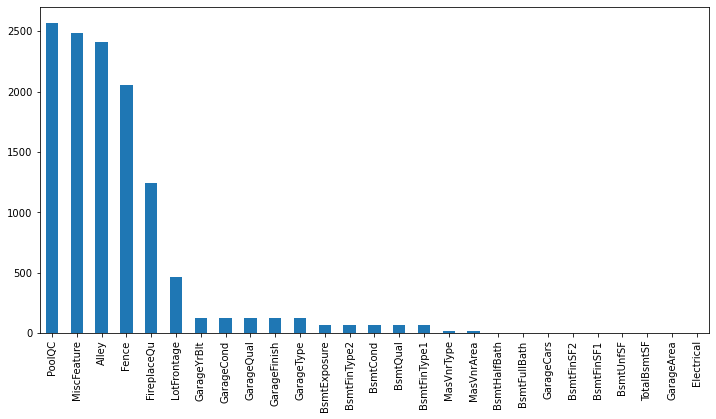

In [7]:
missing = Ames.isnull().apply(lambda x:sum(x), axis=0)
missing = missing[missing>0]
plt.figure(figsize=(12,6))
missing.sort_values(ascending = False).plot.bar()

In [8]:
missing.sort_values(ascending = False)

PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageYrBlt      129
GarageCond       129
GarageQual       129
GarageFinish     129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtCond          69
BsmtQual          69
BsmtFinType1      69
MasVnrType        14
MasVnrArea        14
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Electrical         1
dtype: int64

## Garage

fill all NA with None?

How to deal with this two rows?   

delete them

replace all NA as a character no

In [9]:
select_column_gar = ["GarageYrBlt","GarageCond","GarageQual","GarageType","GarageCars","GarageArea"]
Ames[Ames.GarageType.notnull() & Ames.GarageQual.isnull()]#[select_column_gar]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
433,910201180,1828,150909,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca
531,903426160,1984,160000,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal


In [10]:
Ames[Ames.GarageQual.isnull()][select_column_gar]

,GarageYrBlt,GarageCond,GarageQual,GarageType,GarageCars,GarageArea
17,NaN,NaN,NaN,NaN,0.0,0.0
22,NaN,NaN,NaN,NaN,0.0,0.0
44,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,0.0,0.0
50,NaN,NaN,NaN,NaN,0.0,0.0
54,NaN,NaN,NaN,NaN,0.0,0.0
60,NaN,NaN,NaN,NaN,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,0.0
106,NaN,NaN,NaN,NaN,0.0,0.0
107,NaN,NaN,NaN,NaN,0.0,0.0


In [11]:
Ames[Ames.GarageCars.isnull() & Ames.GarageQual.isnull()][select_column_gar]

,GarageYrBlt,GarageCond,GarageQual,GarageType,GarageCars,GarageArea
433,NaN,NaN,NaN,Detchd,NaN,NaN


## Basement
 
impute mode to two special case

None for all other categorical variables

0 for all other numerical

In [12]:
pd.get_dummies(Ames.BsmtExposure,dummy_na = True)

,Av,Gd,Mn,No,NaN
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,1,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,1,0,0,0


In [13]:
select_columns_bs = ["BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtCond","BsmtQual","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtHalfBath","BsmtFullBath"]
#Ames[Ames.BsmtExposure.isnull() & Ames.BsmtFinType1.notnull()][select_columns_bs]
Ames[Ames.BsmtExposure.isnull()][select_columns_bs]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtHalfBath,BsmtFullBath
5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
96,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
164,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
209,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
215,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
328,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
336,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
452,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
478,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
495,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
Ames.loc[[813,912,1201,2308,2434],select_columns_bs]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtHalfBath,BsmtFullBath
813,NaN,Unf,Unf,TA,Gd,0.0,0.0,936.0,936.0,0.0,0.0
912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,NaN,Unf,Unf,TA,Gd,0.0,0.0,1595.0,1595.0,0.0,0.0
2308,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2434,No,GLQ,NaN,TA,Gd,1124.0,479.0,1603.0,3206.0,0.0,1.0


In [15]:
Ames[Ames.BsmtFinType2.isnull() & Ames.BsmtFinType1.notnull()][select_columns_bs]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtHalfBath,BsmtFullBath
2434,No,GLQ,NaN,TA,Gd,1124.0,479.0,1603.0,3206.0,0.0,1.0


## Masonry veneer
fill type None, Area 0

In [16]:
Ames[Ames.MasVnrType.isnull()][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
175,NaN,NaN
358,NaN,NaN
753,NaN,NaN
787,NaN,NaN
871,NaN,NaN
891,NaN,NaN
951,NaN,NaN
1041,NaN,NaN
1161,NaN,NaN
1355,NaN,NaN


In [17]:
Ames[Ames.MasVnrArea==0][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
0,None,0.0
2,None,0.0
3,None,0.0
4,None,0.0
6,None,0.0
8,None,0.0
11,None,0.0
12,None,0.0
17,None,0.0
19,None,0.0


## Others
fill first 5 None

Electric impute with mode

drop lotfrontage

In [18]:
#Ames.PID.value_counts().sort_values()
Ames[Ames.PID == 909276070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1816,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [19]:
#Ames[Ames.Electrical.isnull()][["Electrical"]]

In [20]:
features_cat = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","Electrical"] #LotFrontage is not discovered yet
for feature in features_cat:
    print(Ames[feature].value_counts())
    print('')

TA    3
Fa    2
Ex    2
Gd    2
Name: PoolQC, dtype: int64

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

Grvl    105
Pave     63
Name: Alley, dtype: int64

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64



## Manipulate NA

In [21]:
# Garage
Ames = Ames.drop([433,531])
# Basement
Ames.loc[[813,1201],"BsmtExposure"] = "No"
select_column = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtHalfBath","BsmtFullBath"]
Ames[select_column] = Ames[select_column].fillna(0)
# Masonry Veneer
Ames.MasVnrArea = Ames.MasVnrArea.fillna(0)
# Electric 
Ames.Electrical = Ames.Electrical.fillna(Ames.Electrical.mode()[0])
# Fill others with None
Ames = Ames.fillna("None")

In [22]:
missing = Ames.isnull().apply(lambda x:sum(x), axis=0)
missing = missing[missing>0]

In [23]:
missing

Series([], dtype: int64)

## Drop columns

In [24]:
Ames.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [36]:
Ames.shape

(2577, 64)

In [26]:
Ames = Ames.drop(1816,axis=0)

In [27]:
drop_columns = ["Alley", "PID", "MSSubClass","MSZoning","LotFrontage","LotArea","Street","LotShape","LandContour",
                      "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","YearBuilt","SaleType","SaleCondition"]

Ames = Ames.drop(drop_columns,axis=1)



# EDA

In [41]:
house = pd.read_csv('data\housing_clean.csv')


In [42]:
house.shape

(2577, 64)

In [43]:
house.head()

,GrLivArea,SalePrice,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,856,126000,AllPub,1Fam,1Story,6,6,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010
1,1049,139500,AllPub,TwnhsE,1Story,5,5,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009
2,1001,124900,AllPub,1Fam,1Story,5,9,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007
3,1039,114000,AllPub,1Fam,2Story,4,8,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009
4,1665,227000,AllPub,1Fam,2Story,8,6,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009


In [33]:
house.isnull().sum(axis=0)

GrLivArea        0
SalePrice        0
Utilities        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

Select different data types

In [ ]:
Ames.dtypes.value_counts()

In [ ]:
feature_numerical = Ames.columns[Ames.dtypes!='object']
feature_categorical = Ames.columns[Ames.dtypes=='object']

In [ ]:
feature_numerical

In [ ]:
feature_categorical

In [ ]:
numeric_var = dict(zip(feature_numerical, np.var(Ames[feature_numerical], 0)))
sorted(numeric_var.items(),key = lambda x:x[1],reverse=True)

In [ ]:
Ames[feature_numerical].isnull().apply(lambda x:sum(x), axis=0)

In [ ]:
numeric_data = Ames[feature_numerical]
numeric_data = numeric_data.fillna(0.0)
F_values, p_values = f_regression(numeric_data, Ames['SalePrice'])

pd.Series(p_values, index=numeric_data.columns).sort_values()

In [ ]:
Ames.drop_duplicates().shape

In [ ]:
Ames.columns

In [ ]:
Ames.filter(regex='Cond$|Qual$')

In [ ]:
numeric_data = Ames[feature_numerical]
numeric_data = numeric_data.fillna(0.0)
F_values, p_values = f_regression(numeric_data, Ames['SalePrice'])

pd.Series(p_values, index=numeric_data.columns).sort_values()